# Graph statistics

Here we visualize graph statistics for several real-world datasets and the synthetically generated dataset. We observe that the synthetic dataset covers a diverse spectrum of fundamental graph statistics in the real-world graphs.

First we compare clustering and shortest path length for all graph datasets. We find that the synthetic data ("syn") covers all regions covered by the cox2 and reddit-binary. Enzymes contains some more unique long and skinny graphs due to protein structures.

600it [00:00, 1281.37it/s]
467it [00:00, 1786.57it/s]
2000it [00:16, 123.25it/s]


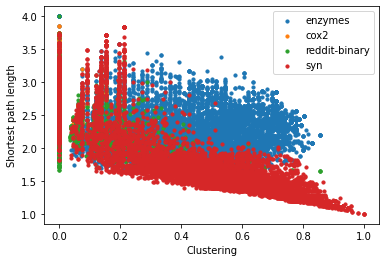

In [5]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import pickle
from common import data, utils, combined_syn

for dataset in ["enzymes", "cox2", "reddit-binary", "syn"]:
    if dataset == "syn":
        gen = combined_syn.get_generator([11])
        graphs = [gen.generate() for i in range(10000)]
    else:
        train, test, task = data.load_dataset(dataset)
        graphs = []
        for i in range(10000):
            graph, neigh = utils.sample_neigh(train, 11)
            graphs.append(graph.subgraph(neigh))

    clustering = [nx.average_clustering(G.subgraph(max(nx.connected_components(G), key=len))) for G in graphs]
    path_length = [nx.average_shortest_path_length(G.subgraph(max(nx.connected_components(G), key=len))) for G in graphs]
    plt.scatter(clustering, path_length, s=10, label=dataset)

plt.xlabel("Clustering")
plt.ylabel("Shortest path length")
plt.legend()
plt.show()

Next we compare diameters and densities of all graph types and again see that the synthetic data generally covers the real-world graphs.

600it [00:00, 1238.75it/s]
467it [00:00, 1757.02it/s]
2000it [00:15, 125.04it/s]


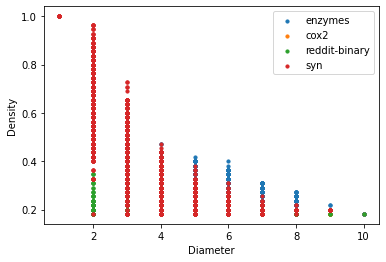

In [6]:
for dataset in ["enzymes", "cox2", "reddit-binary", "syn"]:
    if dataset == "syn":
        gen = combined_syn.get_generator([11])
        graphs = [gen.generate() for i in range(10000)]
    else:
        train, test, task = data.load_dataset(dataset)
        graphs = []
        for i in range(10000):
            graph, neigh = utils.sample_neigh(train, 11)
            graphs.append(graph.subgraph(neigh))

    diameter = [nx.diameter(G.subgraph(max(nx.connected_components(G), key=len))) for G in graphs]
    density = [nx.density(G.subgraph(max(nx.connected_components(G), key=len))) for G in graphs]
    plt.scatter(diameter, density, s=10, label=dataset)

plt.xlabel("Diameter")
plt.ylabel("Density")
plt.legend()
plt.show()